<a href="https://colab.research.google.com/github/Riddhiman-1098/Machine-Learning-Porjects/blob/main/Data_Analysis_on_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [62]:
cols = ['sepal_length', ' sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names=cols)
df.head(100)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor


In [63]:
df['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [96]:
df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<Axes: >

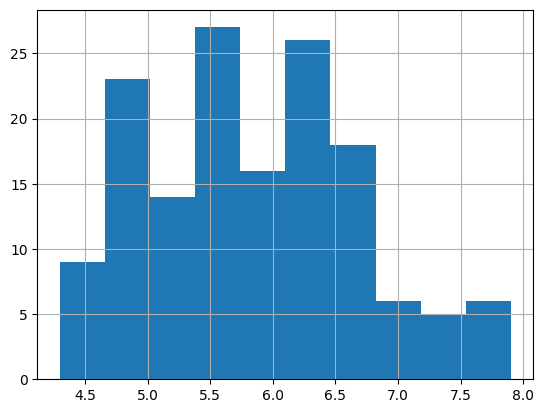

In [64]:
df["sepal_length"].hist()

In [97]:
colors = ['red', 'yellow', 'black']
classes = ["Iris-setosa", "Iris-virginica"]

In [98]:
df.rename(columns={" sepal_width": "sepal_width"}, inplace=True)

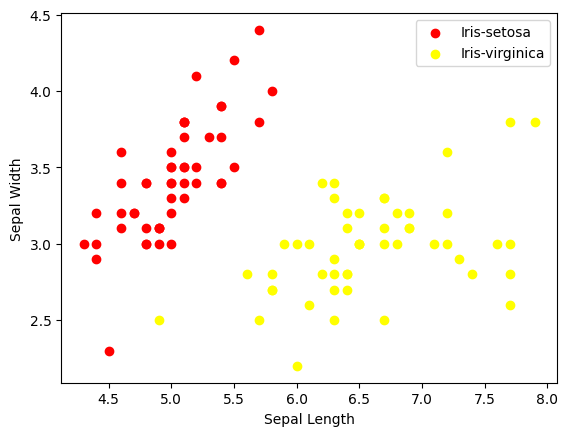

In [99]:
for i in range(2):
    x = df[df['class'] == classes[i]]
    plt.scatter(x["sepal_length"], x["sepal_width"], c = colors[i], label=classes[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.show()

In [68]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<Axes: >

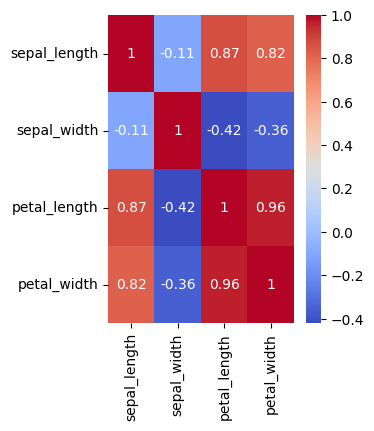

In [69]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(3,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

In [100]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = df.drop(columns=['class'])
Y = df['class']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [101]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [102]:
model.fit(x_train, y_train)

LogisticRegression()

In [103]:
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  100.0


In [81]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000 )

In [82]:
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [83]:
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  95.55555555555556


In [89]:
from sklearn import svm
model = svm.SVC()

In [90]:
model.fit(x_train, y_train)

SVC()

In [91]:
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  95.55555555555556


In [104]:
import pickle
filename = 'savedmodel.sav'
pickle.dump(model, open(filename, 'wb'))

In [105]:

load_model = pickle.load(open(filename,'rb'))

In [109]:

load_model.predict([[1.0, 1.2, 1.0, 2.0]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['Iris-setosa'], dtype=object)